# Entendo o problema

• PROBLEM STATEMENT: Understand the target customers for the marketing team to plan a strategy

• CONTEXT: Your manager wants you to identify the most important shopping groups based on income, age, and the mall shopping score. He want the ideal nu,ber of groups and a label for each of them.

• OBJECTIVE: Divide the mall target market into approachable groups. Create a subset of the market based on demographics and behavioral criteria to better understand the target for marketing activities

## Importanto bibliotecas

In [1]:
#Biblioteca para Análise de Dados
import pandas as pd 

#Biblioteca e algoritmo de clusterização
from sklearn.cluster import KMeans

#Biblioteca para Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Coletando os Dados

Um profissional da área de dados realizou a extração dos dados diretamente do Banco de Dados e forneceu um dataset em formato .csv contendo as observações realizadas pela equipe de marketing.

In [3]:
#Criando o DataFrame (df)
df = pd.read_csv("/content/clientes_shopping.csv")

## Análise exploratória de dados (EDA)

### Entendendo o Dataset

In [4]:
#Visualizando as cinco primeiras e cinco últimas observações
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
#Dimensionalidade do Dataset
linhas, colunas = df.shape
linhas, colunas

(200, 5)

In [6]:
#Sumário do Dataset: tipos de dados e valores não-nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Nome dos atributos - tradução - tipos de dados:
- CustomerID - Identificação do Visitante - Integer
- Genre (Gender) - Gênero do Visitante - String
- Age - Idade do Visitante - Integer
- Annual Income (kR$) - Renda anual do visitante - Integer
- Spending Score (1-100) - Score do Visitante - Integer

In [7]:
#Primeira descrição estatística do Dataset
df.describe().round(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


### Limpeza de dados

#### Excluindo coluna
A coluna CustomerID será excluida por não ser importante para a análise.

In [8]:
#Excluindo coluna CustomerID
df.drop(columns=["CustomerID"], inplace=True)

In [9]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Mudando o nome das colunas

In [10]:
#Renomeando colunas
df.rename(columns= {"Genre": "Genero", "Age": "Idade", "Annual Income (k$)": "Renda_Anual(kR$)", "Spending Score (1-100)": "Score(1-100)"}, inplace=True)

In [11]:
df.head()

,Genero,Idade,Renda_Anual(kR$),Score(1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Traduzindo informações na colina Genero

In [12]:
#Conferindo valores únicos
df["Genero"].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
#Traduzindo informações
df["Genero"] = df["Genero"].replace(["Male", "Female"], ["Masculino", "Feminino"])

In [14]:
df.head()

,Genero,Idade,Renda_Anual(kR$),Score(1-100)
0,Masculino,19,15,39
1,Masculino,21,15,81
2,Feminino,20,16,6
3,Feminino,23,16,77
4,Feminino,31,17,40


In [15]:
#Duplicatas
df.duplicated().sum()

0

In [16]:
#Valores NaN
df.isna().sum()

Genero              0
Idade               0
Renda_Anual(kR$)    0
Score(1-100)        0
dtype: int64

In [17]:
#Valores nulos
df.isnull().sum()

Genero              0
Idade               0
Renda_Anual(kR$)    0
Score(1-100)        0
dtype: int64

### Descrição estatítica
Pós limpeza de dados

In [18]:
df.describe().round(2)

,Idade,Renda_Anual(kR$),Score(1-100)
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


### Análise univariável

#### Variáveis categóricas

**Gênero**

In [19]:
#Quantidade de Valores únicos
df["Genero"].nunique()

2

In [20]:
#Valores únicos
df["Genero"].unique()

array(['Masculino', 'Feminino'], dtype=object)

In [21]:
#Quant. pessoas agrupadas por gênero
df["Genero"].value_counts()

Feminino     112
Masculino     88
Name: Genero, dtype: int64

In [22]:
#Quant. pessoas agrupada por gênero - porcentagem
df["Genero"].value_counts(normalize=True)

Feminino     0.56
Masculino    0.44
Name: Genero, dtype: float64

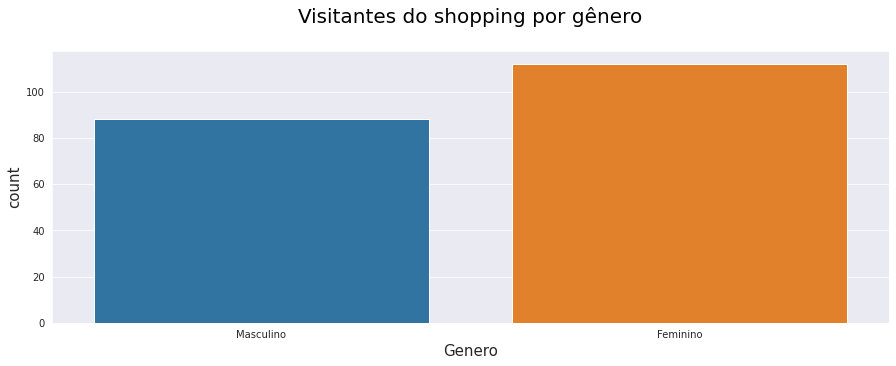

In [23]:
#Visualização da contagem de pessoas por gẽnero
plt.figure(figsize=(15, 5))
plt.title("Visitantes do shopping por gênero\n", fontsize=20, color='black')
plt.xlabel("Gênero", fontsize=15)
plt.ylabel("Contagem de Visitantes", fontsize=15)
sns.countplot(df['Genero'])
plt.show()

#### Variáveis numéricas

**Idade**

In [24]:
#Número de valores únicos
df["Idade"].nunique()

51

In [25]:
#Distribuição da Idade
df["Idade"].describe().round(2)

count    200.00
mean      38.85
std       13.97
min       18.00
25%       28.75
50%       36.00
75%       49.00
max       70.00
Name: Idade, dtype: float64

In [26]:
#Kurtosis da distribuição da Idade
#Assimetria da distribuição da Idade
print(f"Curtose: {df['Idade'].kurt()}")
print(f"Assimetria: {df['Idade'].skew()}")

Curtose: -0.6715728615981695
Assimetria: 0.48556885096681657


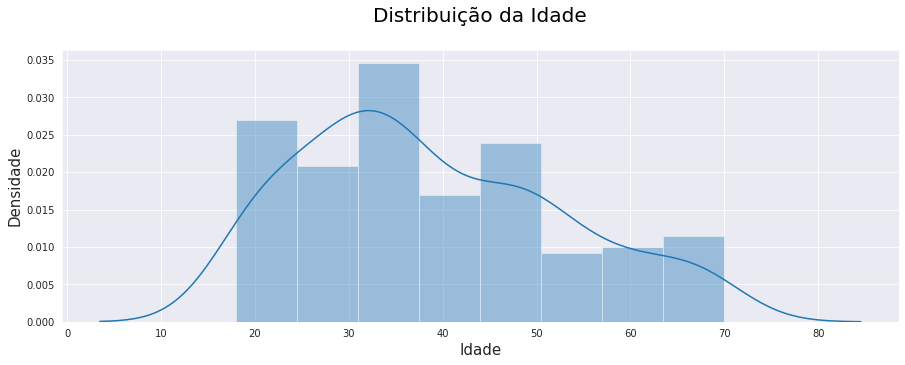

In [27]:
#Visualização da distribuição da Idade
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Idade\n", fontsize=20, color='black')
plt.xlabel("Variação da Idade", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.distplot(df["Idade"])
plt.show()

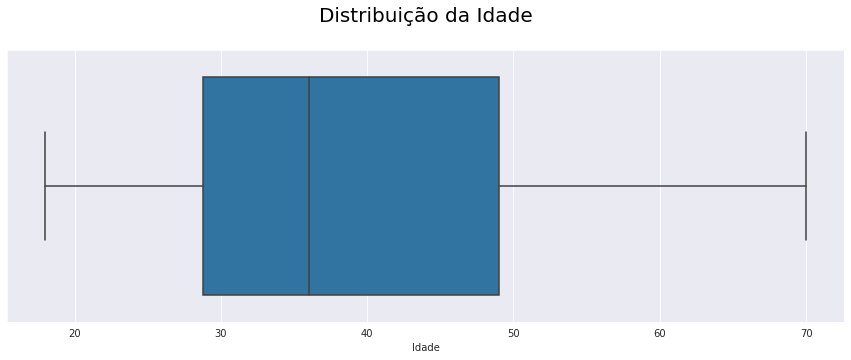

In [28]:
#Visualização boxplot para detecção de outliers
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Idade\n", fontsize=20, color='black')
sns.boxplot(data= df, x= "Idade")
plt.show()

**Renda Anual (R$k)**

In [29]:
#Valores únicos
df.nunique()

Genero               2
Idade               51
Renda_Anual(kR$)    64
Score(1-100)        84
dtype: int64

In [30]:
#Distribuição da Renda_Anual(kR$)
df["Renda_Anual(kR$)"].describe().round(2)

count    200.00
mean      60.56
std       26.26
min       15.00
25%       41.50
50%       61.50
75%       78.00
max      137.00
Name: Renda_Anual(kR$), dtype: float64

A renda anual tem uma distribuição próxima da normal. Os valores de média e mediana são bem próximos.

In [31]:
#Kurtosis da distribuição da Renda_Anual(kR$)
#Assimetria da distribuição da Renda_Anual(kR$)
print(f"Curtose: {df['Renda_Anual(kR$)'].kurt()}")
print(f"Assimetria: {df['Renda_Anual(kR$)'].skew()}")

Curtose: -0.09848708652696203
Assimetria: 0.3218425498619055


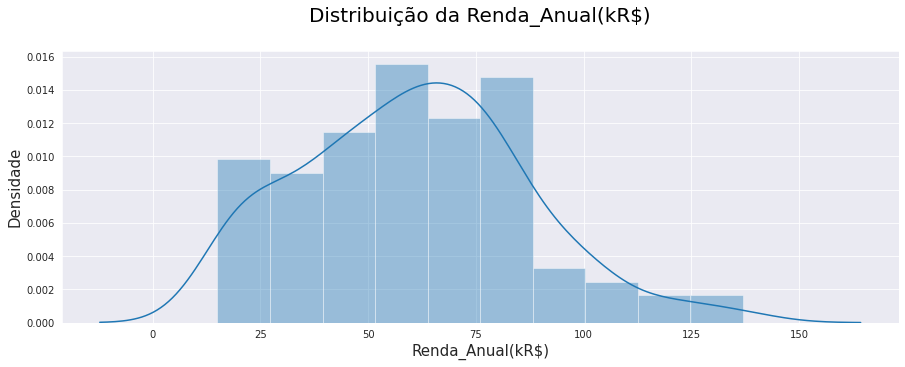

In [32]:
#Visualização da distribuição da Renda_Anual(kR$)
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Renda_Anual(kR$)\n", fontsize=20, color='black')
plt.xlabel("Renda_Anual(kR$)", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.distplot(df["Renda_Anual(kR$)"])
plt.show()

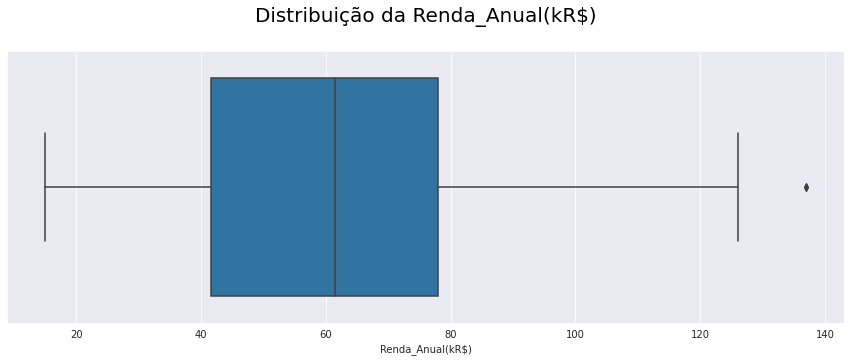

In [33]:
#Visualização boxplot para detecção de outliers
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Renda_Anual(kR$)\n", fontsize=20, color='black')
sns.boxplot(data= df, x= "Renda_Anual(kR$)")
plt.show()

**Score(1-100)**

In [34]:
#Valores únicos
df["Score(1-100)"].nunique()

84

In [35]:
#Distribuição do Score(1-100)
df["Score(1-100)"].describe().round(2)

count    200.00
mean      50.20
std       25.82
min        1.00
25%       34.75
50%       50.00
75%       73.00
max       99.00
Name: Score(1-100), dtype: float64

O Score tem uma distribuição próxima da normal. Os valores de média e mediana são bem próximos.

In [36]:
#Kurtosis da distribuição do Score(1-100)
#Assimetria da distribuição do Score(1-100)
print(f"Curtose: {df['Score(1-100)'].kurt()}")
print(f"Assimetria: {df['Score(1-100)'].skew()}")

Curtose: -0.8266291062061502
Assimetria: -0.047220201374263374


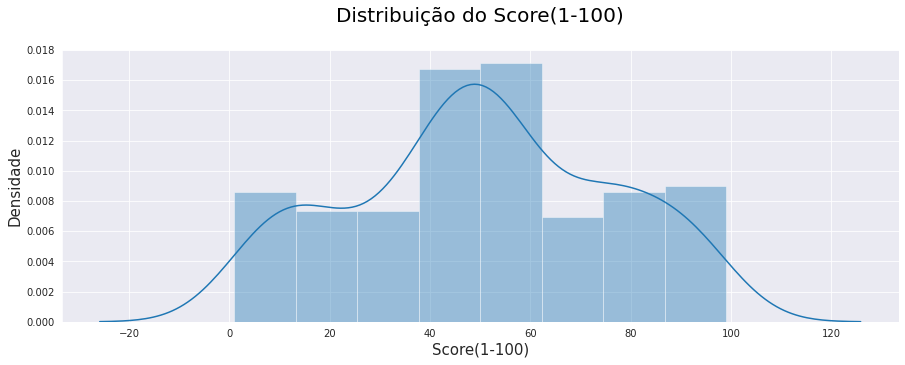

In [37]:
#Visualização da distribuição do Score(1-100)
plt.figure(figsize=(15, 5))
plt.title("Distribuição do Score(1-100)\n", fontsize=20, color='black')
plt.xlabel("Score(1-100)", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.distplot(df["Score(1-100)"])
plt.show()

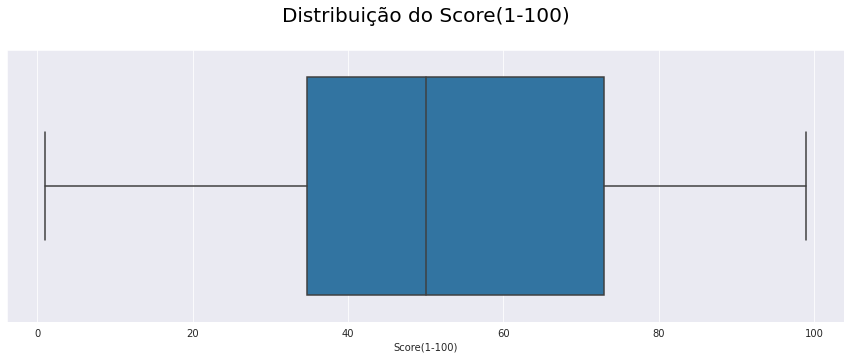

In [38]:
#Visualização boxplot para detecção de outliers
plt.figure(figsize=(15, 5))
plt.title("Distribuição do Score(1-100)\n", fontsize=20, color='black')
sns.boxplot(data= df, x= "Score(1-100)")
plt.show()

### Análise bivariável (Correlações)

#### Distribuição da Idade, Renda Anual e Score agrupados por Gênero

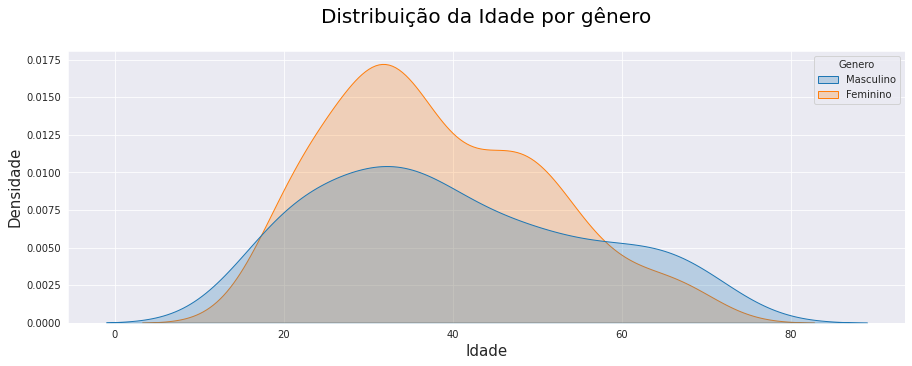

In [39]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Idade por gênero\n", fontsize=20, color='black')
plt.xlabel("Idade", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.kdeplot(df["Idade"], shade=True, hue=df["Genero"])
plt.show()

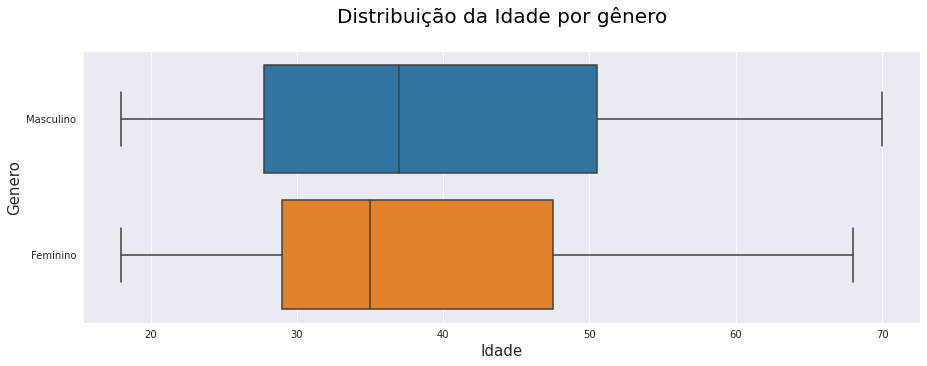

In [40]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Idade por gênero\n", fontsize=20, color='black')
plt.xlabel("Idade", fontsize=15)
plt.ylabel("Genero", fontsize=15)
sns.boxplot(data=df, x="Idade", y="Genero")
plt.show()

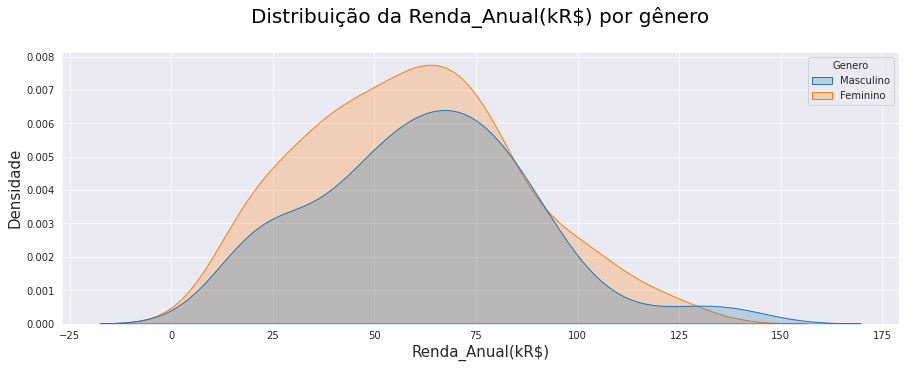

In [41]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Renda_Anual(kR$) por gênero\n", fontsize=20, color='black')
plt.xlabel("Renda_Anual(kR$)", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.kdeplot(df["Renda_Anual(kR$)"], shade=True, hue=df["Genero"])
plt.show()

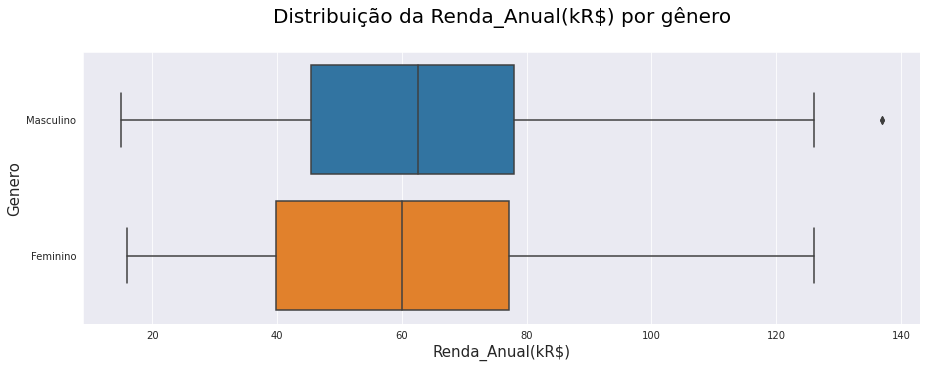

In [42]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição da Renda_Anual(kR$) por gênero\n", fontsize=20, color='black')
plt.ylabel("Genero",fontsize=15)
plt.xlabel("Renda_Anual(kR$)",fontsize=15)
sns.boxplot(data=df, x="Renda_Anual(kR$)", y="Genero")
plt.show()

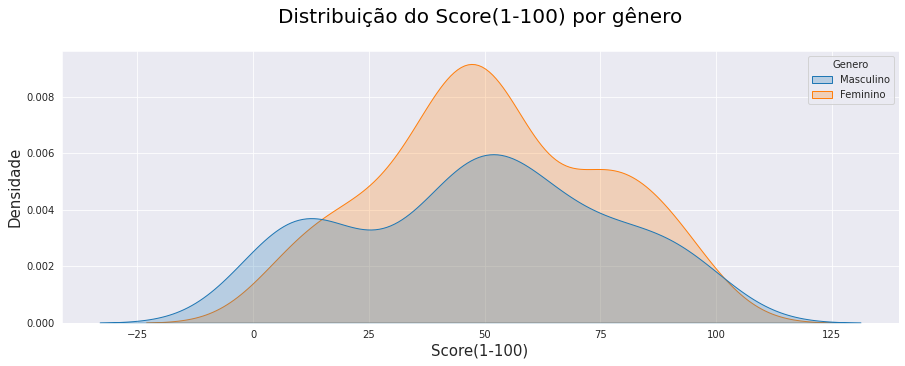

In [43]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição do Score(1-100) por gênero\n", fontsize=20, color='black')
plt.xlabel("Score(1-100)", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.kdeplot(df["Score(1-100)"], shade=True, hue=df["Genero"])
plt.show()

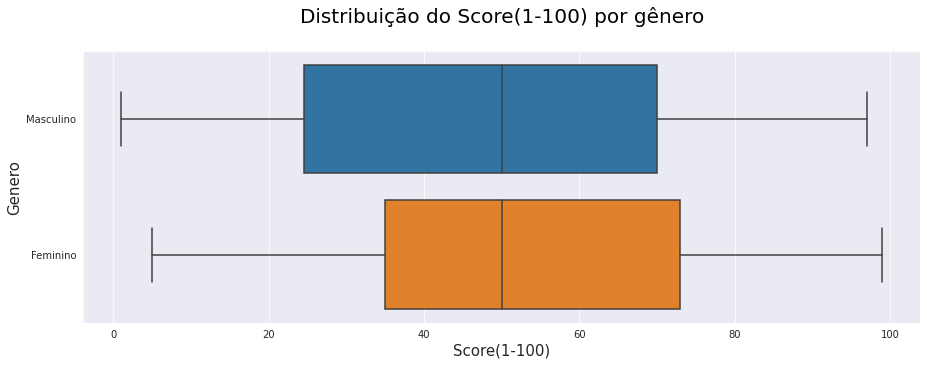

In [44]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição do Score(1-100) por gênero\n", fontsize=20, color='black')
plt.xlabel("Score(1-100)", fontsize=15)
plt.ylabel("Genero", fontsize=15)
sns.boxplot(data=df, x="Score(1-100)", y="Genero")
plt.show()

Importante destacar que, em geral, as mulheres apresentam uma maior frequencia do que os homens na distribuição de cada um dos atributos. A média da renda anual do genero masculino está maior que a média feminina devido ao outlier.

<Figure size 1080x360 with 0 Axes>

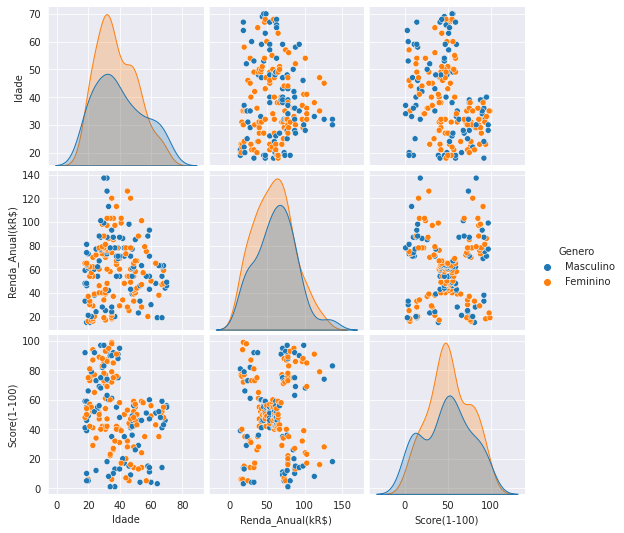

In [49]:
#Visualizando relação entre variáveis utilizando-se um pairplot
plt.figure(figsize=(15, 5))
sns.pairplot(data=df, hue="Genero")
plt.show()

In [50]:
#Coeficiente de correlação de Pearson entre os atributos numéricos contínuos
df.corr()

,Idade,Renda_Anual(kR$),Score(1-100)
Idade,1.000000,-0.012398,-0.327227
Renda_Anual(kR$),-0.012398,1.000000,0.009903
Score(1-100),-0.327227,0.009903,1.000000


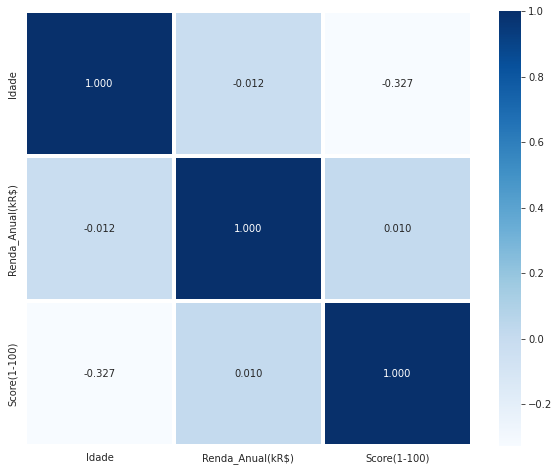

In [69]:
#Visualizando o coeficiente de correlação de Pearson
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidth=3, fmt=".3f")
plt.show()

Podemos observar que não há grandes correlações entre os atributos.